# Salary Predictions Based on Job Descriptions

# Step 3: Develop

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
import sys
sys.path.insert(0, './scripts')

from helpers import load_data, mean_squared_error
from Preprocessing import Preprocessing

## Engineering features
* Ensure data is ready for modeling (make Preprocessing.py)
* Create any new features to enhance the model

I wrote Preprocessing.py to do any transformations on the data to get it ready for the models.

In [4]:
path = './model_validation_data/'
files = ['train.csv', 'test.csv']

train_data = load_data(path, files[0], verbose=True)

----------------------------------train shape-----------------------------------
                                  (694059, 7)                                   
------------------------------train's column types------------------------------
salary                  int64
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
dtype: object
-----------------------------train first five rows------------------------------
                  salary         jobType       degree      major industry  \
jobId                                                                       
JOB1362685151623     121  VICE_PRESIDENT    BACHELORS    BIOLOGY      OIL   
JOB1362684547558      99             CTO  HIGH_SCHOOL       NONE   HEALTH   
JOB1362684683175     110         MANAGER  HIGH_SCHOOL       NONE     AUTO   
JOB1362684716169     141          JUNIOR     DOCTORAL       NONE   

In [5]:
target = 'salary'
features = [x for x in train_data.columns if x != target]

train_features = train_data[features].copy()
train_salary = train_data[target].copy()
del train_data

I need to separate out the training and tuning data before any preprocessing occurs so I ensure the models are only learning from the training data.

In [6]:
from sklearn.model_selection import train_test_split
features_train, features_tune, salary_train, salary_tune = train_test_split(train_features, train_salary, random_state=44)

## Creating Models
* Creating and tuning models ([Linear Regression](#Creating-Models:-Linear-Regression), 
[K-Nearest Neighbors](#Creating-Models:-K-Nearest-Neighbors),
[Random Forest Regressor](#Creating-Models:-Random-Forest))

### Creating Models: Linear Regression

I'm going to start assessing my models with a simple __Linear Regression__ model. This is the basic regression model used by many companies through Excel. There are more complex models utilizing both Linear Regression and penalties, and I will be looking at those after I've tested the Linear Regression model with and without feature engineering.

In [45]:
cols_to_filter = ['companyId']
ordinal_cols = {'jobType': ['JANITOR', 'JUNIOR', 'SENIOR', 'MANAGER', 'VICE_PRESIDENT', 'CFO', 'CTO', 'CEO'],
                'degree': ['NONE', 'HIGH_SCHOOL', 'BACHELORS', 'MASTERS', 'DOCTORAL']
               }

p_simple = Preprocessing(cols_to_filter=cols_to_filter, ordinal_cols=ordinal_cols)

#t_ denotes that the data has been transformed
t_features_train = p_simple.fit_transform(features_train)
t_features_tune = p_simple.transform(features_tune)

t_features_train.head()

,jobType,degree,yearsExperience,milesFromMetropolis,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,major_ENGINEERING,major_LITERATURE,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
jobId,,,,,,,,,,,,,,,,,,,,
JOB1362684436101,1.000000,0.5,0.500000,0.676768,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
JOB1362685235155,0.857143,0.0,0.041667,0.606061,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
JOB1362684848538,0.000000,0.0,0.791667,0.787879,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
JOB1362685076073,0.000000,0.0,0.333333,0.949495,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
JOB1362685152718,0.428571,1.0,0.041667,0.101010,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(t_features_train, salary_train)

salary_pred = lr.predict(t_features_tune)
error = mean_squared_error(salary_pred, salary_tune)
print(f"Error: {error}")

Error: 379.6120460101556


In [47]:
cols_to_filter = ['companyId']
ordinal_cols = {'jobType': ['JANITOR', 'JUNIOR', 'SENIOR', 'MANAGER', 'VICE_PRESIDENT', 'CFO', 'CTO', 'CEO'],
                'degree': ['NONE', 'HIGH_SCHOOL', 'BACHELORS', 'MASTERS', 'DOCTORAL']
               }
binned_cols = {'yearsExperience': 5}
p = Preprocessing(cols_to_filter=cols_to_filter, ordinal_cols=ordinal_cols,
                  binned_cols=binned_cols, grad_types=True,
                  combo=True                          
                 )

#t_ denotes that the data has been transformed
t_features_train = p.fit_transform(features_train)
t_features_tune = p.transform(features_tune)

t_features_train.head()

,jobType,degree,yearsExperience,milesFromMetropolis,attendedCollege,gradTypes,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,...,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,combo
jobId,,,,,,,,,,,,,,,,,,,,,
JOB1362684436101,1.000000,0.5,0.500000,0.676768,True,0.777778,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.298193
JOB1362685235155,0.857143,0.0,0.041667,0.606061,False,0.000000,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0.025943
JOB1362684848538,0.000000,0.0,0.791667,0.787879,False,0.444444,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0.442797
JOB1362685076073,0.000000,0.0,0.333333,0.949495,False,0.111111,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0.170984
JOB1362685152718,0.428571,1.0,0.041667,0.101010,True,0.333333,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.037844


In [12]:
t_features_tune.head()

,jobType,degree,yearsExperience,milesFromMetropolis,attendedCollege,gradTypes,major_BIOLOGY,major_BUSINESS,major_CHEMISTRY,major_COMPSCI,...,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,combo
jobId,,,,,,,,,,,,,,,,,,,,,
JOB1362684726456,0.000000,0.25,0.000000,0.707071,False,0.000000,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0.000000
JOB1362685354568,0.142857,1.00,0.541667,0.797980,True,0.777778,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0.301264
JOB1362684749941,0.428571,1.00,0.958333,0.545455,True,1.000000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0.620098
JOB1362684976789,0.714286,0.50,0.416667,0.484848,True,0.777778,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0.280612
JOB1362685069181,0.714286,0.25,0.291667,0.666667,False,0.111111,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0.175000


In [48]:
lr = LinearRegression()

lr.fit(t_features_train, salary_train)

salary_pred = lr.predict(t_features_tune)
error = mean_squared_error(salary_pred, salary_tune)
print(f"Feature Engineered Error: {error}")

Feature Engineered Error: 367.355949977777


### Creating Models: K-Nearest Neighbors

I'm going to start __K-Nearest Neighbor (KNN)__ model. I need to figure out what the best option for 'k' will be as well as how I would like to weight these neighbors when doing the calculation. For instance, it may be fruitful to make sure instances which are far away are not as prevalent as instances which are closer. Another option I will test is treating all k-nearest instances the the same.

In [49]:
from sklearn.neighbors import KNeighborsRegressor

def tune_parameters_KNN(X_train, X_tune, y_train, y_tune, k, weights='distance'):
    """Finds the MSE of Nearest Neighbor Regression on a varying number of nearest neigbors
    Args:
        X: DataFrame, Feature data
        y: Series, Target data
        k: list of ints, number of neighbors to make the regression
        weights: string, tells the model how to weight the neighbors when calculating the regression
        
    Returns:
        error: ndarray, holds MSE between the predicted salary and the actual salary
    """
    
    error = np.zeros(len(k))
    
    for i, n_neighbors in enumerate(k):
        knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, n_jobs=-1)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_tune)
        error[i] = mean_squared_error(y_pred, y_tune)
        
        del knn
        
        print(f"Number of Neighbors: {n_neighbors}")
        print(f"Error: {error[i]}")
    
    return error
        

In [19]:
k_dis = [x for x in range(4, 100, 10)]

# Distance weighting of neighbors error
dis_error = tune_parameters_KNN(t_features_train, t_features_tune, salary_train, salary_tune, k_dis)

Number of Neighbors: 4
Error: 489.85047876169597
Number of Neighbors: 14
Error: 441.62691051745554
Number of Neighbors: 24
Error: 432.4422734096559
Number of Neighbors: 34
Error: 428.24383054112553
Number of Neighbors: 44
Error: 425.85013443348134
Number of Neighbors: 54
Error: 424.4234859283292
Number of Neighbors: 64
Error: 423.51160805546806
Number of Neighbors: 74
Error: 422.8460656109531
Number of Neighbors: 84
Error: 422.52642209761154
Number of Neighbors: 94
Error: 422.32914463351966


In [20]:
k_uw = [x for x in range(4, 100, 10)]

# Uniform weighting of neighbors error
uw_error = tune_parameters_KNN(t_features_train, t_features_tune, salary_train, salary_tune, k_uw, weights='uniform')

Number of Neighbors: 4
Error: 425.8673068610783
Number of Neighbors: 14
Error: 367.85955210600514
Number of Neighbors: 24
Error: 359.8724673379183
Number of Neighbors: 34
Error: 356.32798053916144
Number of Neighbors: 44
Error: 354.2440731926385
Number of Neighbors: 54
Error: 353.14186533170937
Number of Neighbors: 64
Error: 352.538800461967
Number of Neighbors: 74
Error: 352.20100883618346
Number of Neighbors: 84
Error: 352.3439351241173
Number of Neighbors: 94
Error: 352.53708949709136


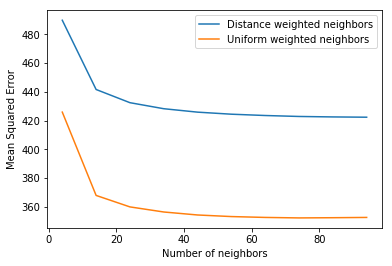

In [21]:
plt.plot(k_dis, dis_error, label='Distance weighted neighbors')
plt.plot(k_uw, uw_error, label='Uniform weighted neighbors')
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Squared Error')
plt.legend()

The MSE for KNN is minimized when *n_neighbors* is set to about 74 and the neighbors are uniformly weighted when performing the regression. They both show the same trajectory in their errors, but uniform is better by about 70 for each value of neighbor. 

Initially, I ran the KNN algorithm without scaling the numerical values, and that was rather disconcerting because MSE for KNN was plateauing about 475 rather than the 352 it is now. I then remembered that I would be weighting the numerical columns with a higher importance because they were outside of the dummied features' range. I re-adjusted Preprocessing.py to make the training data span 0-1 and to transform the test data on the same scale provided by the training data. The same scale is used for both the test and training sets because we can not learn any new information from the test data, including a better way to scale the testing data.

In the future, I would also test various metrics being used for the distance formula. I still might when performing the grid search, but I have yet to decide at this stage right now.

### Creating Models: Random Forest

Now, I'll start tuning for the __Random Forest (RF)__ regression model. I'll tune the *max_depth*, *max_features*, and *min_samples_leaf* features seperately with a smaller number of estimators. Then I will give a fine tune with a grid search of hyperparameter values closer to the best values for the small number of estimators. Note that I will be using oob score as a kind of cross validation when building the forest to quantify the accuracy of each model. This cross validation will output the average $R^2$ score on the data not used in each estimator. The higher the oob score, the better the parameters are for the model. 

In [8]:
# baseline model so we know how much better changing the hyperparameters makes the model
from sklearn.ensemble import RandomForestRegressor

# All of these parameters will remain the same when I change the hyperparameters
rf = RandomForestRegressor(random_state=44, n_estimators=35, criterion='mse', n_jobs=-1)


rf.fit(t_features_train, salary_train)
rf_baseline_salary_pred = rf.predict(t_features_tune)
rf_baseline_error = mean_squared_error(rf_baseline_salary_pred, salary_tune)

del rf

print(f"Baseline Error: {rf_baseline_error}")

Baseline Error: 424.09947422934766


In [11]:
# Values for max_depth I'd like to test
max_depths = [1, 5, 10, 11, 12, 13, 14, 15, 16, 17, 20, 25]

mse_md = np.zeros(len(max_depths))
    
for i, max_depth in enumerate(max_depths):
    # Every hyperparameter is their default, I just wanted to be explicit
    rf = RandomForestRegressor(max_depth=max_depth, n_estimators=35,
                                min_samples_leaf=1, max_features='auto',
                                n_jobs=-1, random_state=44,
                                criterion='mse'
                              )
        
    rf.fit(t_features_train, salary_train)
    salary_pred = rf.predict(t_features_tune)
        
    mse_md[i] = mean_squared_error(salary_pred, salary_tune)
    del rf
    
    print(f"Maximum depth: {max_depth}")
    print(f"MSE: {mse_md[i]}")

Maximum depth: 1
MSE: 1044.3218202749115
Maximum depth: 5
MSE: 559.3964051133263
Maximum depth: 10
MSE: 396.0011719753005
Maximum depth: 11
MSE: 381.4735719030418
Maximum depth: 12
MSE: 371.49028491192223
Maximum depth: 13
MSE: 364.4704644124682
Maximum depth: 14
MSE: 360.5838889411303
Maximum depth: 15
MSE: 360.04476943039225
Maximum depth: 16
MSE: 362.1085574513115
Maximum depth: 17
MSE: 366.4388912502845
Maximum depth: 20
MSE: 385.31653192878935
Maximum depth: 25
MSE: 413.4155333948385


Minimum MSE occurs when max_depth is set to 15


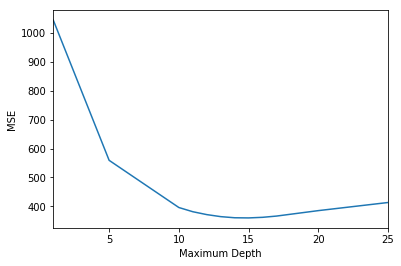

In [16]:
max_depth_results = pd.Series(mse_md, index=max_depths)

ax = max_depth_results.plot()
ax.set_xlabel('Maximum Depth')
ax.set_ylabel('MSE')

print(f"Minimum MSE occurs when max_depth is set to {max_depth_results.idxmin()}")

In [18]:
# Values for min_samples_leaf hyperparameter
min_samples_leaf = [1, 2, 3, 6, 8, 9, 10,11, 12, 13, 14, 16, 17, 18, 20, 25]
mse_msl = np.zeros(len(min_samples_leaf))

for i, sample in enumerate(min_samples_leaf):

    rf = RandomForestRegressor(n_estimators=35, max_depth=15,
                               min_samples_leaf=sample, max_features='auto',
                               n_jobs=-1, random_state=44
                              )
    rf.fit(t_features_train, salary_train)
    salary_pred = rf.predict(t_features_tune)
        
    mse_msl[i] = mean_squared_error(salary_pred, salary_tune)

    del rf
    
    print(f"Samples: {sample}")
    print(f"MSE: {mse_msl[i]}")

Samples: 1
MSE: 360.04476943039225
Samples: 2
MSE: 359.67765578971625
Samples: 3
MSE: 359.1846208291261
Samples: 6
MSE: 358.0535826474342
Samples: 8
MSE: 357.4240302514295
Samples: 9
MSE: 357.2053802622666
Samples: 10
MSE: 357.0820009052427
Samples: 11
MSE: 356.95232238253084
Samples: 12
MSE: 356.8228262022445
Samples: 13
MSE: 356.71825413644774
Samples: 14
MSE: 356.67885484491256
Samples: 16
MSE: 356.486774448772
Samples: 17
MSE: 356.4684671358036
Samples: 18
MSE: 356.42379539993675
Samples: 20
MSE: 356.43034550403763
Samples: 25
MSE: 356.50137183656216


The minimum MSE occurs when min_samples_leaf is set to 18


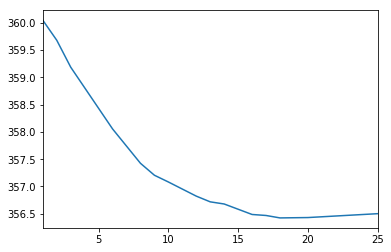

In [19]:
min_leaf_results = pd.Series(mse_msl, index=min_samples_leaf)

print("The minimum MSE occurs when min_samples_leaf is"
      f" set to {min_leaf_results.idxmin()}"
     )

min_leaf_results.plot()

In [22]:
# Values I'll be testing for Hyperparameter max_features
max_features = ['auto', 'sqrt', 'log2', None, .1, .2, .3, .4, .5, .6, .7, .8, .9]
mse_mf = np.zeros(len(max_features))

for i, max_feature in enumerate(max_features):

    rf = RandomForestRegressor(n_estimators=35, max_depth=15,
                               min_samples_leaf=18, max_features=max_feature,
                               n_jobs=-1, random_state=44
                              )
    rf.fit(t_features_train, salary_train)
    salary_pred = rf.predict(t_features_tune)
        
    mse_mf[i] = mean_squared_error(salary_pred, salary_tune)
    del rf
    
    print(f"Method: {max_feature}")
    print(f"MSE: {mse_mf[i]}")

Method: auto
MSE: 356.42379539993675
Method: sqrt
MSE: 362.1337557654112
Method: log2
MSE: 362.1337557654112
Method: None
MSE: 356.42379539993675
Method: 0.1
MSE: 387.0431456173938
Method: 0.2
MSE: 362.13375576541125
Method: 0.3
MSE: 356.35228566774157
Method: 0.4
MSE: 354.57559353454366
Method: 0.5
MSE: 354.5308780684621
Method: 0.6
MSE: 354.67960957796635
Method: 0.7
MSE: 354.4832107758144
Method: 0.8
MSE: 354.64927227232903
Method: 0.9
MSE: 355.01336052983186


The minimum MSE occurs when max_features is set to 0.7


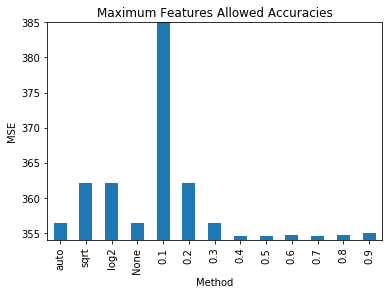

In [23]:
max_features_result = pd.Series(mse_mf, index=max_features)

ax = max_features_result.plot.bar(ylim=(354, 385))
ax.set_xlabel('Method')
ax.set_ylabel('MSE')
ax.set_title('Maximum Features Allowed Accuracies')

print("The minimum MSE occurs when max_features is"
      f" set to {max_features_result.idxmin()}"
     )

In [24]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = [5, 10, 15, 25, 35, 50, 75]

mse_ne = np.zeros(len(n_estimators))

for i, n in enumerate(n_estimators):
    rf = RandomForestRegressor(n_estimators=n, max_depth=15,
                               min_samples_leaf=18, max_features=.7,
                               n_jobs=-1, random_state=44
                              )
    rf.fit(t_features_train, salary_train)
    salary_pred = rf.predict(t_features_tune)
        
    mse_ne[i] = mean_squared_error(salary_pred, salary_tune)
    del rf
    
    print(f"Method: {n}")
    print(f"MSE: {mse_ne[i]}")

Method: 5
MSE: 360.0147457087335
Method: 10
MSE: 356.80727698125844
Method: 15
MSE: 355.7859985991801
Method: 25
MSE: 354.8179075801172
Method: 35
MSE: 354.4832107758144
Method: 50
MSE: 354.12877499242575
Method: 75
MSE: 353.86938221292


The minimum error occurs when n_estimators is set to 75


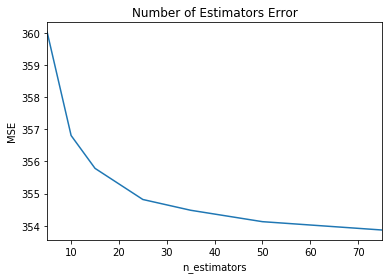

In [27]:
n_estimators_result = pd.Series(mse_ne, index=n_estimators)

ax = n_estimators_result.plot()
ax.set_xlabel('n_estimators')
ax.set_ylabel('MSE')
ax.set_title('Number of Estimators Error')

print("The minimum error occurs when n_estimators is"
      f" set to {n_estimators_result.idxmin()}"
     )

In a perfect world where I had unlimited computing power and infinite time, I would tune keep increasing n_estimators for as long as my patience would allow (probably around n_estimators=10000) to squeeze out that last thousandth of a percent out of the model. But, I have neither time nor computing power on my hand, so I will be using n_estimators=35 and forgo the extra couple of percentage points of accuracy increasing the estimators will create. This will allow my model to still have a high accuracy while also not limiting my time to actually train the models. 

In the future, I want to try tuning n_estimators first. Then I will tune the remaining hyperparameters using the n_estimators value at which accuracy begins to plateau. This will allow the tuning process to run quicker instead of taking up almost an entire day. After the rest of the hyperparameters are tuned, then I can increase the number of estimators for the final model with no adverse affects.

In [29]:
# tuned Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(n_estimators=50,
                           random_state=44,
                           criterion='mse',
                           n_jobs=-1
                          )

parameters = {'min_samples_leaf':[17, 18, 19],
              'max_depth': [14, 15, 16],
              'max_features': [.35, .4, .5, .7]
             }

clf = GridSearchCV(rf, parameters, cv=5)

clf.fit(t_features_train, salary_train)
rf_salary_pred = clf.predict(t_features_tune)
rf_error = mean_squared_error(rf_salary_pred, salary_tune)

print(f"Random Forest tuned MSE: {rf_error}")

Random Forest tuned MSE: 353.224425478855


In [31]:
clf.best_params_

{'max_depth': 16, 'max_features': 0.35, 'min_samples_leaf': 17}

These are all on the edges, so I'm going to widen the window a little on each side and run another grid search with 3 folds

In [32]:
rf = RandomForestRegressor(n_estimators=50,
                           random_state=44,
                           criterion='mse',
                           n_jobs=-1
                          )

parameters = {'min_samples_leaf':[16, 17, 18],
              'max_depth': [16, 17, 18],
              'max_features': [.3, .35, .4]
             }

clf = GridSearchCV(rf, parameters, cv=3, scoring='neg_mean_squared_error')

clf.fit(t_features_train, salary_train)
rf_salary_pred = clf.predict(t_features_tune)
rf_error = mean_squared_error(rf_salary_pred, salary_tune)

print(f"Random Forest tuned MSE: {rf_error}")

Random Forest tuned MSE: 352.85381319351717


In [33]:
clf.best_params_

{'max_depth': 18, 'max_features': 0.35, 'min_samples_leaf': 17}

In [34]:
rf = RandomForestRegressor(n_estimators=50,
                           random_state=44,
                           criterion='mse',
                           n_jobs=-1
                          )

parameters = {'min_samples_leaf':[16, 17, 18],
              'max_depth': [20, 21, 22],
              'max_features': [.32, .35, .37]
             }

clf = GridSearchCV(rf, parameters, cv=3, scoring='neg_mean_squared_error')

clf.fit(t_features_train, salary_train)
rf_salary_pred = clf.predict(t_features_tune)
rf_error = mean_squared_error(rf_salary_pred, salary_tune)

print(f"Random Forest tuned MSE: {rf_error}")

Random Forest tuned MSE: 352.6354076330616


In [35]:
clf.best_params_

{'max_depth': 20, 'max_features': 0.35, 'min_samples_leaf': 17}

In [41]:
from sklearn.model_selection import cross_val_score
# Values for max_depth I'd like to test
max_depths = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

cv_md = np.zeros(len(max_depths))
    
for i, max_depth in enumerate(max_depths):
    # Every hyperparameter is their default, I just wanted to be explicit
    rf = RandomForestRegressor(max_depth=max_depth, n_estimators=50,
                                min_samples_leaf=17, max_features=.35,
                                n_jobs=-1, random_state=44,
                                criterion='mse'
                              )
   
    cv_md[i] = -np.mean(cross_val_score(rf, t_features_train, salary_train, scoring='neg_mean_squared_error', cv=3))
    del rf
    
    print(f"Maximum depth: {max_depth}")
    print(f"Cross-Validated MSE: {cv_md[i]}")

Maximum depth: 20
Cross-Validated MSE: 352.0620603976643
Maximum depth: 21
Cross-Validated MSE: 352.17288987341635
Maximum depth: 22
Cross-Validated MSE: 352.14573152964164
Maximum depth: 23
Cross-Validated MSE: 352.08781144286104
Maximum depth: 24
Cross-Validated MSE: 352.1094453066733
Maximum depth: 25
Cross-Validated MSE: 352.02390453848085
Maximum depth: 26
Cross-Validated MSE: 352.1322039739721
Maximum depth: 27
Cross-Validated MSE: 352.12723556081914
Maximum depth: 28
Cross-Validated MSE: 352.13281029660146
Maximum depth: 29
Cross-Validated MSE: 352.12649304564184
Maximum depth: 30
Cross-Validated MSE: 352.12649304564184


It appears I will not be getting a better Random Forest model with this data than I will with the hyperparameters set to:
* max_depth=25
* min_samples_leaf=17
* max_features=.35
* n_estimators=50

I may increase n_estimators to 100 just to get a tiny bit better results when I do my 5-fold cross-validation.

## Testing Models
* Doing a 5-fold cross validation on models and measuring MSE

In [42]:
def cv_models(model, X_train, y_train, cv=5):
    """Calculates the cv score for a given model, training data and number of folds
    """
    return -np.mean(cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv))

In [57]:
models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=75, weights='uniform', n_jobs=-1),
    "Random Forest": RandomForestRegressor(max_depth=25, min_samples_leaf=17, max_features=.35,
                                           n_estimators=100, n_jobs=-1, random_state=44        
    )
}

errors = {}

for name, model in models.items():
    errors[name] = cv_models(model, t_features_train, salary_train)

In [58]:
errors

{'Linear Regression': 364.27216844151235,
 'K-Nearest Neighbors': 351.31823490179653,
 'Random Forest': 350.754789621688}

## Selecting the Best Model
* Selecting the model with the lowest error as the "production" model

As we can see from the above cell, the Random Forest model just barely edges out the K-Nearest Neighbors model for the best MSE on the 5-fold cross validation. Now it is time to make the final production model. You can find that procedure [here](./04_Deploy.ipynb)